In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
plt.rcParams.update({'font.size':20})

In [2]:
customer=pd.read_csv('Telco-Customer-Churn.csv')
# not leave out columns when checking 
pd.set_option('display.max_columns',None)
customer.sample(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1530,3703-VAVCL,Male,0,Yes,Yes,2,Yes,No,Fiber optic,No,No,Yes,Yes,No,Yes,Month-to-month,No,Credit card (automatic),90.00,190.05,Yes
5975,1522-VVDMG,Male,0,Yes,Yes,7,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,89.75,608.8,Yes
2939,8802-UNOJF,Male,1,No,No,12,Yes,No,Fiber optic,No,Yes,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,83.80,1029.75,Yes
5971,9800-OUIGR,Male,0,Yes,Yes,66,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.00,1374.2,No
1344,0536-BGFMZ,Female,0,Yes,No,28,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.50,563.05,No
532,4234-XTNEA,Male,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.95,174.45,No
3314,2402-TAIRZ,Female,0,No,No,37,Yes,No,Fiber optic,No,Yes,Yes,No,No,No,One year,No,Electronic check,80.05,3019.1,No
4722,7581-EBBOU,Female,0,No,No,60,Yes,No,DSL,No,Yes,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),70.15,4224.7,No
1616,6518-PPLMZ,Male,0,Yes,Yes,53,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.40,1110.35,No
3453,0326-VDYXE,Female,0,Yes,No,70,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,97.65,6982.5,No


## Customer Churn Analysis
1. Find out common charateristics of customer churn   
2. Figure out a model to predict customer churn 

### Data cleaning 

In [3]:
#any null
customer.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
# any duplicates
customer.duplicated().sum()

0

In [5]:
# data type 
customer.dtypes
# should convert totalcharges to float
# but valueerror:can't convert to float 
customer['TotalCharges'].value_counts()
# There are 11 NaN. 
customer['TotalCharges']=pd.to_numeric(customer['TotalCharges'],errors='coerce')
# check customers with NaN total charges 
customer[customer['TotalCharges'].isnull().values==True]
# It showes that teir tenure was zero, which means they just started the service. However, normally, we need to pay for the service the minute we start it.
# Therefore, we will replace the total charges with monthly fee and replace tenure 0 with 1. 
customer['TotalCharges'].fillna(customer['MonthlyCharges'],inplace=True)
customer['tenure'].replace(0,1,inplace=True)



### Customer Analysis 
We will use visualization to explore what may lead to customer churn. 

#### Total customer churn  

Text(0.5, 1.0, 'Churn Ratio')

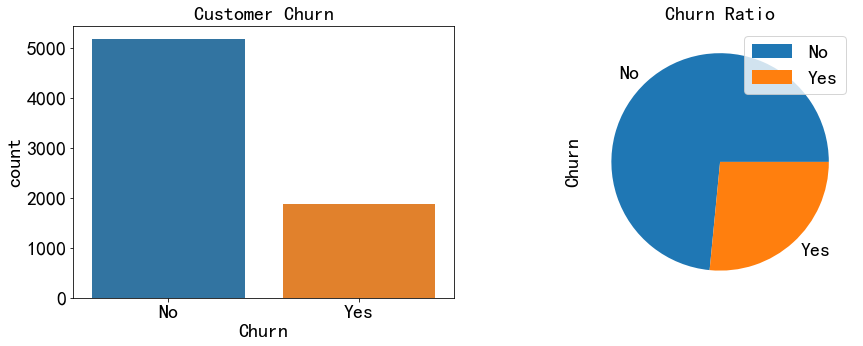

In [6]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Churn',data=customer,ax=ax1)
customer['Churn'].value_counts().to_frame().plot(kind='pie',y='Churn',ax=ax2)
ax1.set_title('Customer Churn',fontsize=20)
ax2.set_title('Churn Ratio',fontsize=20
             )


### User Attribute 
#### Gender 

<AxesSubplot:xlabel='Churn', ylabel='count'>

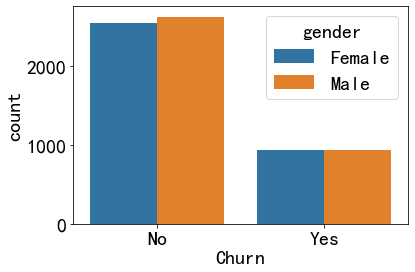

In [7]:
sns.countplot(x='Churn',hue='gender',data=customer)


<AxesSubplot:xlabel='Churn', ylabel='count'>

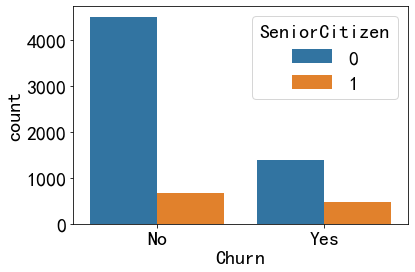

In [8]:
sns.countplot(x='Churn',hue='SeniorCitizen',data=customer)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


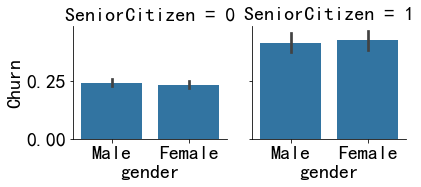

In [9]:
customer['Churn']=customer['Churn'].replace('No',0).replace('Yes',1)
g=sns.FacetGrid(customer, col='SeniorCitizen')
g.map(sns.barplot,'gender','Churn')

Text(0.5, 1.0, 'Has dependents')

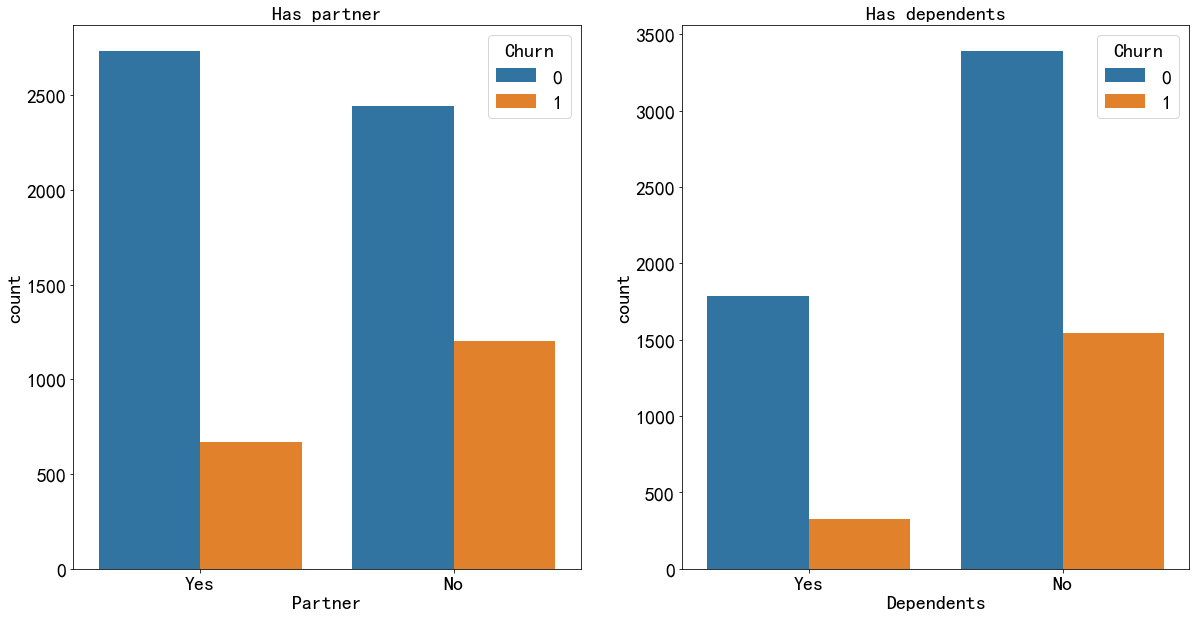

In [10]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(20,10))

sns.countplot(x='Partner',hue='Churn',data=customer,ax=ax1,order=['Yes','No'])
ax1.set_title('Has partner',fontsize=20)
sns.countplot(x='Dependents',hue='Churn',data=customer,ax=ax2,order=['Yes','No'])
ax2.set_title('Has dependents',fontsize=20)

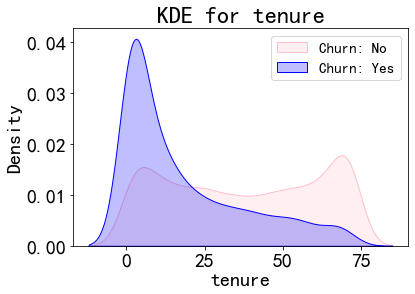

In [11]:
# tenure 
sns.kdeplot(customer[customer['Churn']==0]['tenure'].dropna(),color='pink',label='Churn: No',shade='True')
sns.kdeplot(customer[customer['Churn']==1]['tenure'].dropna(),color='blue',label='Churn: Yes',shade='True')
plt.title('KDE for tenure')
plt.legend(fontsize=15)
plt.show()


### User Attribute Description 
1. There was no gender difference in customer churn. 
2. Senior citizens were more likely to exit. 
3. Compared to users with partners, less users had dependents. Users with partners or dependents were less likely to exit. 
4. From KDE, customer churn happened most often in the first year and after tenure hit the third year, churn rate was less than retention rate. 

### Suggestions 
1. Dig what senior citizens care when they choose telecommunication provider, such as by survey. 
2. Check the product for families and make a comparison with competitors if necessary. 
3. Keep track of customer activities of the first year to explore factors that make them cancel service. 


## Service attribute 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


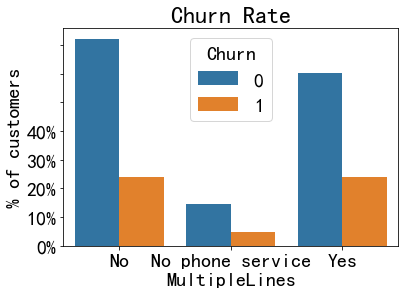

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


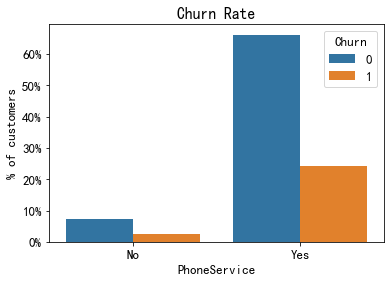

In [12]:
def barplot_percentage(service,axis_name='% of customers'):
    g=(customer.groupby(service)['Churn'].value_counts()/len(customer)).to_frame()
    g.rename(columns={'Churn':axis_name},inplace=True)
    g.reset_index(inplace=True)
    ax=sns.barplot(x=service,y=axis_name,hue='Churn',data=g)
    ax.set_yticklabels(['{:.0%}'.format(y) for y in ax.get_yticks()])
    plt.title('Churn Rate')
    plt.rcParams.update({'font.size':13})
    plt.show()
barplot_percentage('MultipleLines')

barplot_percentage('PhoneService')


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


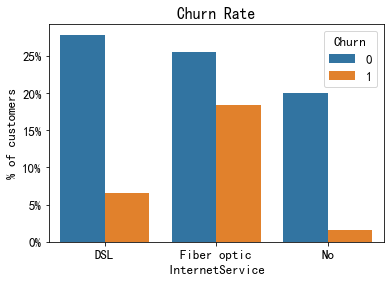

In [13]:
barplot_percentage('InternetService')

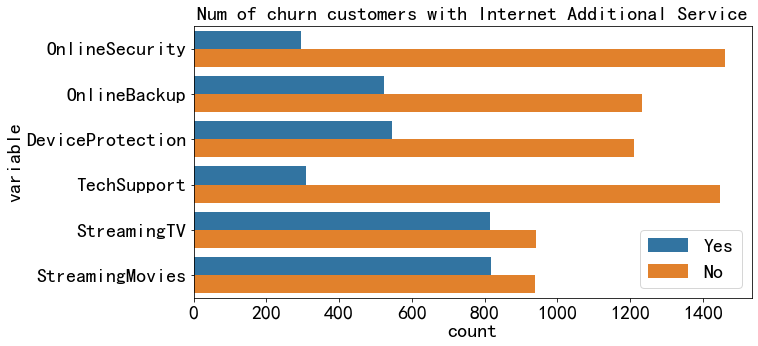

In [31]:
plt.figure(figsize=(10,5))
Addtional_service=customer[(customer['InternetService'] !='No')& (customer.Churn==1)]
cols=["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"] 
Addtional_service=pd.melt(Addtional_service[cols])
Addtional_service.rename(columns={'value':'Has Service'},inplace=True)
ax=sns.countplot(y='variable',data=Addtional_service,hue='Has Service')
ax.set_title('Num of churn customers with Internet Additional Service',fontsize=20)
plt.rcParams.update({'font.size':20})
plt.legend(fontsize=20)
plt.show()

### Service attribute 
1. Almost 20% users with phone service became churn customers.
2. THe number of those without Internet service was less than those with Internet service. 
3. Among Internet Service, uers with fiber optic were most likely to exit. 
4. For Additional service, there was a bigger gap, with customers without services like online security, online backup, device protection and tech support  more likely to exit.
5. Customers without streaming services were also more likely to exit though the difference was not significant. 

### Suggestions 
1. Check whether there is anything wrong with fiber opic (speed, maintenance..). Possible methods can be supervising the speed, collect customer satisfaction data based on complaint call/maintenance call/comment etc. 
2. Check what makes those with Internet service exit. Although those with no Internet service were less likely to exit, they brought less revenue. THerefore, we should figure out why people having Internet service cancel. 
2. More marketing about addiontal Internet service should be done to retain customers, such as introducing the importance of online security. 
3. Streaming TV and Movies are becoming increasingly attractive, expecially in the pandemic, and thus should be managed carefully to retain customers. 


## Contract attribute 

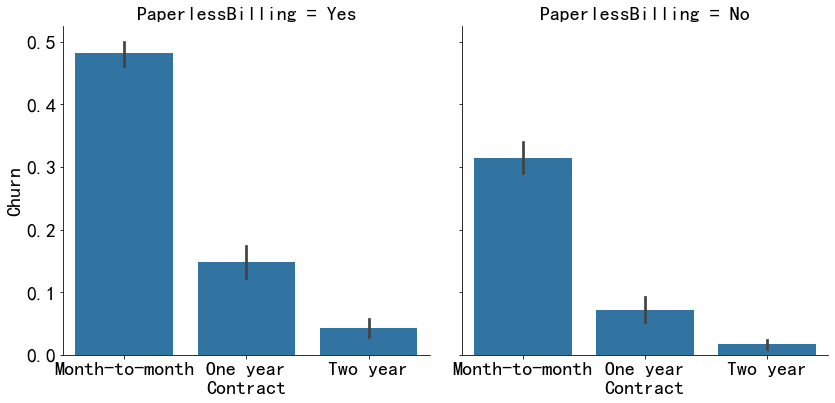

In [15]:
g=sns.FacetGrid(customer,col='PaperlessBilling',height=6,aspect=1)
ax=g.map(sns.barplot,'Contract','Churn',order=['Month-to-month','One year','Two year'])
plt.show()

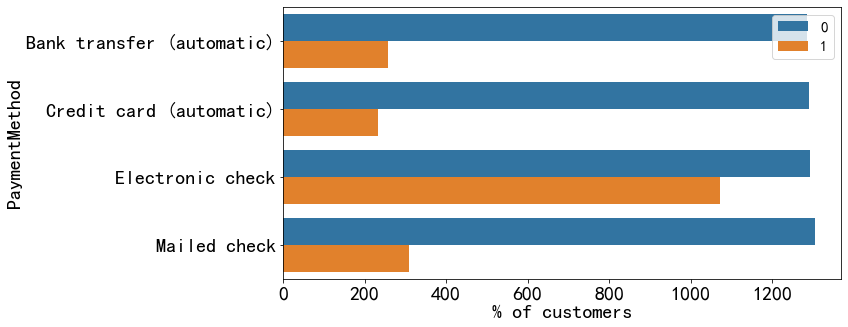

In [35]:
plt.figure(figsize=(10,5))
p=customer.groupby('PaymentMethod')['Churn'].value_counts().to_frame()
p.rename(columns={'Churn':'% of customers'},inplace=True)
p.reset_index(inplace=True)
sns.barplot(y='PaymentMethod',x='% of customers',hue='Churn',data=p)
plt.rcParams.update({'font.size':10})
plt.legend(fontsize=15)


Text(0.5, 1.0, 'KDE for Monthly Charges')

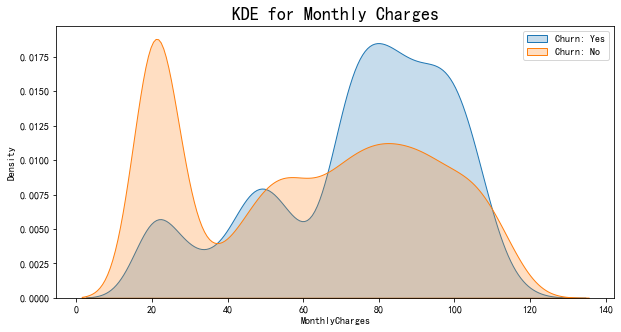

In [38]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=customer[customer.Churn==1]['MonthlyCharges'],label='Churn: Yes',shade=True)
sns.kdeplot(data=customer[customer.Churn==0]['MonthlyCharges'],label='Churn: No',shade=True)
plt.legend()
plt.rcParams.update({'font.size':15})
plt.title('KDE for Monthly Charges')

Text(0.5, 1.0, 'KDE for Total Charges')

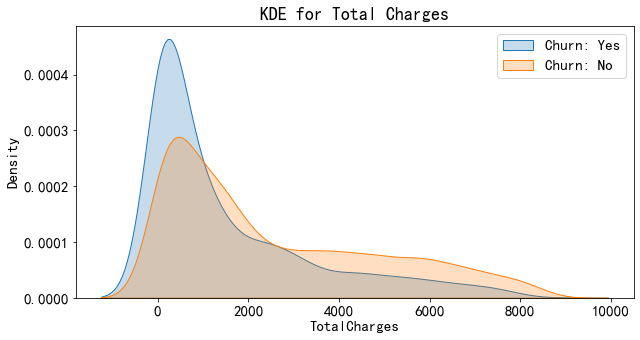

In [40]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=customer[customer.Churn==1]['TotalCharges'],label='Churn: Yes',shade=True)
sns.kdeplot(data=customer[customer.Churn==0]['TotalCharges'],label='Churn: No',shade=True)
plt.legend()
plt.title('KDE for Total Charges')

### Contract Attribute
1. Those use paperless billing were more likely to become churn customers. 
2. There was a better chance to churn customers if it was a month-to-month contract, followed by one year contract. 
3. For monthly charges ranging from 70 to 110, it was more likely to churn customers. 
4. The more the total charges , the lower the churn rate. 

### Suggestions 
1. Check whether there was any problem with paperless billing and imrprove user experience. 
2. When customers started service, recommend two-year contract  by providing discount or other additional service if allowed.
3. For customers with higher monthly charges, make sure they understood what they got is good value for money. 

## Customer Churn Model

#### Data Preparation 
1. Delete 'customerID' due to irrelevance
2. Standardize the rest of data 

In [19]:
# drop customerID because it was not relevant 
customer.drop(['customerID'],axis=1,inplace=True)


In [20]:
# select all dicrete data 
cateCols=[c for c in customer.columns if customer[c].dtype=='object' or c=='SeniorCitizen']
cateDF=customer[cateCols].copy()
cateDF.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [21]:
# encoding 
for col in cateCols:
    if cateDF[col].nunique() == 2:
        cateDF[col]=pd.factorize(cateDF[col])[0]
    else:
        cateDF=pd.get_dummies(cateDF, columns=[col])



In [22]:
cateDF['tenure']=customer['tenure']
cateDF['MonthlyCharges']=customer['MonthlyCharges']
cateDF['TotalCharges']=customer['TotalCharges']
cateDF['Churn']=customer['Churn']

<AxesSubplot:>

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


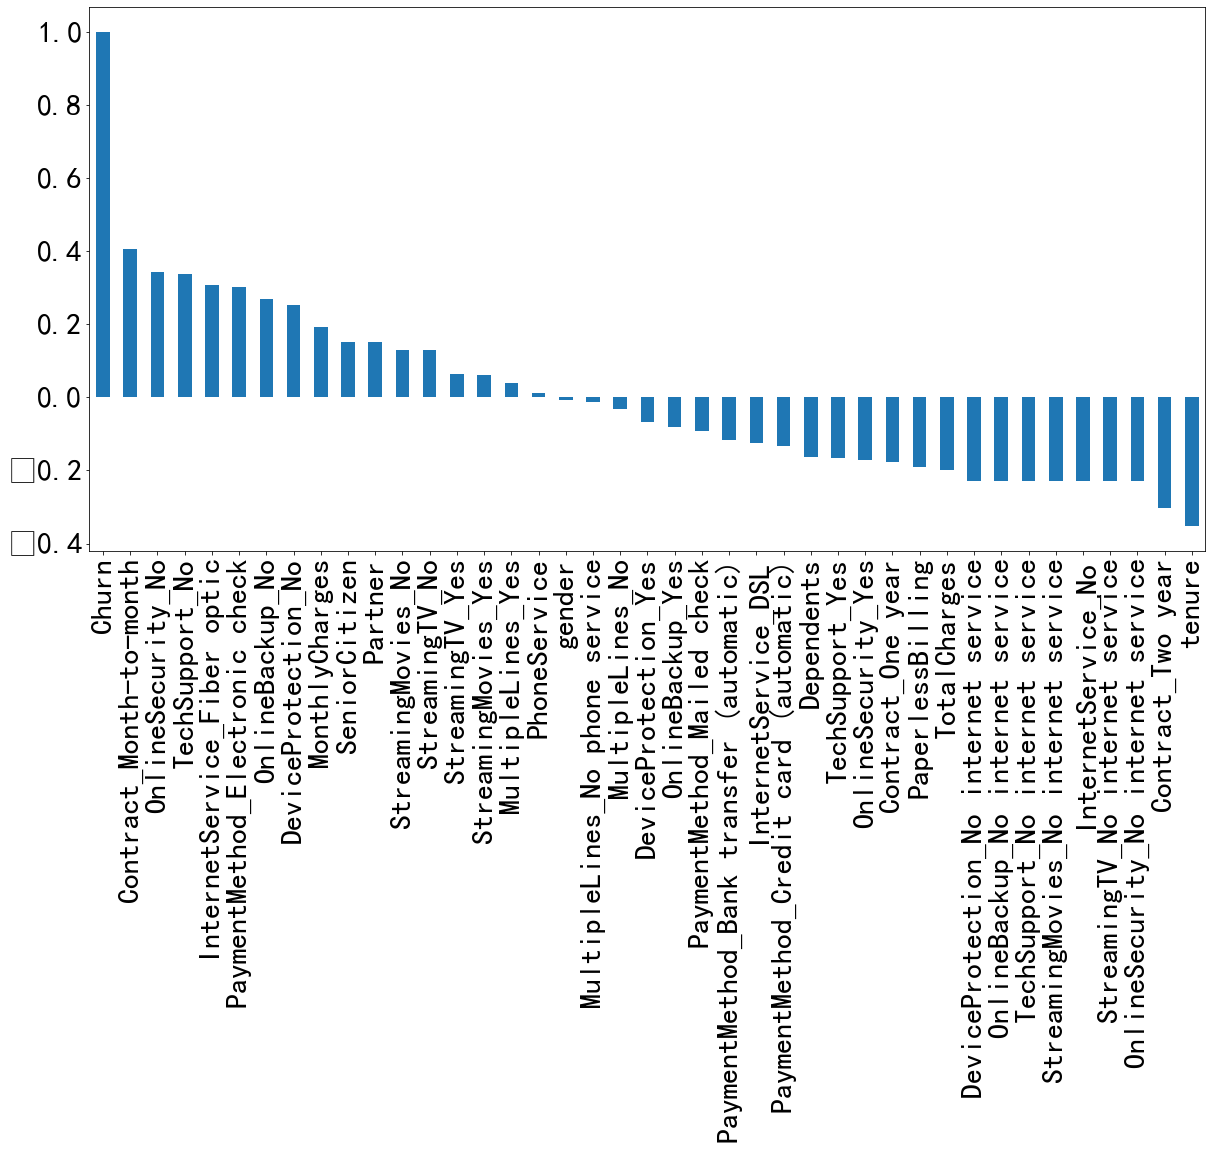

In [23]:
# correlation 
plt.figure(figsize=(20,10))
cateDF.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

In [24]:
# select features

# drop features with weak correlation
dropcols=['gender','PhoneService',
           'OnlineSecurity_No internet service', 'OnlineBackup_No internet service',
           'DeviceProtection_No internet service', 'TechSupport_No internet service',
           'StreamingTV_No internet service', 'StreamingMovies_No internet service']
cateDF.drop(dropcols,inplace=True,axis=1)



In [25]:
# set target 
target=cateDF['Churn'].values

# tolist 
columns=cateDF.columns.tolist()


##### training set and test set 


In [26]:

# select features (remove target)
columns.remove('Churn')
features=cateDF[columns].values



In [27]:
# 30% for test, 70% for training 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC   
from sklearn.tree import DecisionTreeClassifier              
from sklearn.neighbors import KNeighborsClassifier    
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from  sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.30, stratify = target, random_state = 1)
#stratify=target based on ['Churn']

In [28]:
# set up classifiers
classifiers = [
    SVC(random_state = 1, kernel = 'rbf'),    
    DecisionTreeClassifier(random_state = 1, criterion = 'gini'),
    RandomForestClassifier(random_state = 1, criterion = 'gini'),
    KNeighborsClassifier(metric = 'minkowski'),
    AdaBoostClassifier(random_state = 1)  
]

# classifier names
classifier_names=[
    'svc',
    'decisiontreeclassifier',
    'randomforestclassifier',
    'kneighborsclassifier',
    'adaboostclassifier'
]

# parameter 
classifier_param_grid = [
            {'svc__C':[0.1], 'svc__gamma':[0.01]},
            {'decisiontreeclassifier__max_depth':[6,9,11]},
            {'randomforestclassifier__n_estimators':range(1,11)} ,
            {'kneighborsclassifier__n_neighbors':[4,6,8]},
            {'adaboostclassifier__n_estimators':[70,80,90]}]

In [29]:
# evaluate classifier
def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, param_grid, score = 'accuracy_score'):
    response = {}
    gridsearch = GridSearchCV(estimator = pipeline, param_grid = param_grid, cv=3, scoring = score)
    # find the optimal parameter and accuracy
    search = gridsearch.fit(train_x, train_y)
    print("GridSearch best parameter：", search.best_params_)
    print("GridSearch best scores： %0.4lf" %search.best_score_)
    predict_y = gridsearch.predict(test_x)
    print(" accuracy %0.4lf" %accuracy_score(test_y, predict_y))
    response['predict_y'] = predict_y
    response['accuracy_score'] = accuracy_score(test_y,predict_y)
    return response
 
for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipeline = Pipeline([
            (model_name, model)
    ])
    result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score = 'accuracy')


GridSearch best parameter： {'svc__C': 0.1, 'svc__gamma': 0.01}
GridSearch best scores： 0.7560
 accuracy 0.7591
GridSearch best parameter： {'decisiontreeclassifier__max_depth': 6}
GridSearch best scores： 0.7777
 accuracy 0.7927
GridSearch best parameter： {'randomforestclassifier__n_estimators': 10}
GridSearch best scores： 0.7702
 accuracy 0.7842
GridSearch best parameter： {'kneighborsclassifier__n_neighbors': 8}
GridSearch best scores： 0.7690
 accuracy 0.7870
GridSearch best parameter： {'adaboostclassifier__n_estimators': 70}
GridSearch best scores： 0.7998
 accuracy 0.8050


### Model Selection 
Based on best scores and accuracy, we will go with AdaBoostClassifier.